In [1]:
# Add Magic Command
%matplotlib inline

# Add dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading data from csv files and stores it in a DataFrame
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [3]:
# Checks for the total number of rows, which includes a header row
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
# Checks to see if any of the rows have empty values in them
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Checks data types to see what column we can merge the dataframe with another dataframe with
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Pulls all unique values from a specific column
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Gets the total number of cities based on their type
sum(city_data_df["type"]=="Rural")

18

In [8]:
# Checks for the total number of rows, which includes a header row
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
# Checks to see if any of the rows have empty values in them
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
# Checks data types to see what column we can merge the dataframe with another dataframe with
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
# Merging the two DataFrames into one workable 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left',  on=['city','city'])

In [16]:
# Creates DataFrames of all citys based on their type
urban_cities_df = pyber_data_df[pyber_data_df['type'] == "Urban"]
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [15]:
# Creates a series of the number of rides in each city based on their type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

In [22]:
# Creates a series of the average fare for each city based on its type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

In [23]:
# Creates a series of the average driver count for each city based on its type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

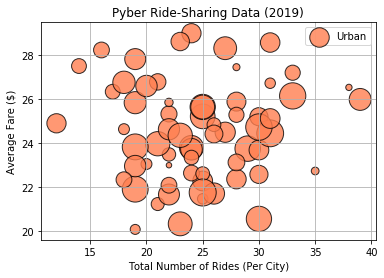

In [29]:
# Creating Bubble chart using MatPlotLib method for Urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c='coral', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Urban')
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

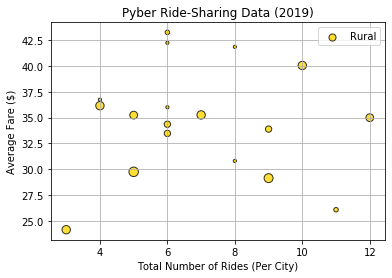

In [34]:
# Creates Bubble Chart for Rural Cities
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            c='gold', edgecolor='black', 
            linewidths=1, alpha=0.8, 
            label='Rural')
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

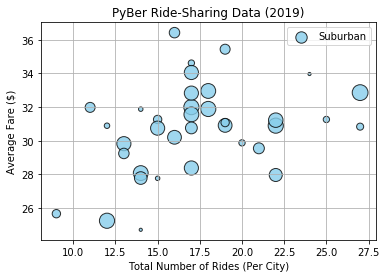

In [33]:
# Creates Bubble Chart for Suburban Cities
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue', 
            edgecolor='black', linewidth=1, 
            alpha=0.8, label='Suburban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

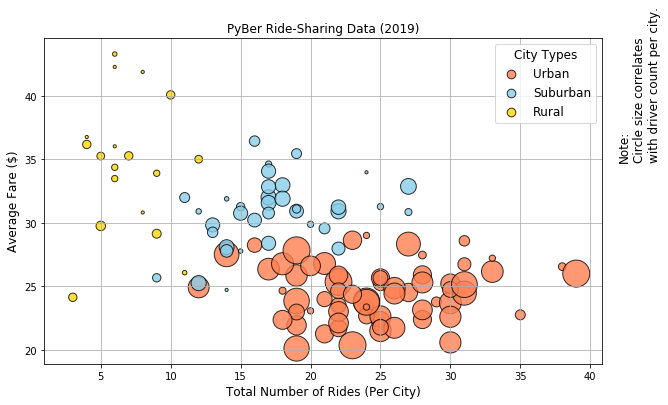

In [92]:
# Shows all three cities in one Bubble Chart
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            c='coral',
            edgecolor='black', linewidths=1,
            alpha=0.8, label='Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue', 
            edgecolor='black', linewidth=1, 
            alpha=0.8, label='Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            c='gold', edgecolor='black', 
            linewidths=1, alpha=0.8, 
            label='Rural')
# Styles Chart
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Notes
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12", rotation='vertical')
plt.savefig("analysis/Fig1.png")
plt.show()

In [42]:
# Gathering Summary Statistics by Urban cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [43]:
# Gathering Summary Statistics by Rural cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [44]:
# Gathering Summary Statistics by Suburban cities (DataFrame)
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [45]:
# Gathering Summary Statistics for Urban ride Counts (Series)
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [47]:
# Gathering Summary Statistics for Suburban ride Counts (Series)
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [48]:
# Gathering Summary Statistics for Rural ride Counts (Series)
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [49]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [50]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [53]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [54]:
# Statistics on ride counts using numpy for Urban cities
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [55]:
# Statistics on ride counts using numpy for Suburban cities
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [56]:
# Statistics on ride counts using numpy for Rural cities
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [57]:
# Gathers all fare Data for all cities based on type
urban_fares = urban_cities_df['fare']
rural_fares = rural_cities_df['fare']
suburban_fares = suburban_cities_df['fare']

In [61]:
# Mean for cities by type using numpy
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

The mean fare price for urban trips is $24.53.
The mean fare price for rural trips is $34.62.
The mean fare price for suburban trips is $30.97.


In [62]:
# Median for cities by type using numpy
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

The median fare price for urban trips is $24.64.
The median fare price for rural trips is $37.05.
The median fare price for suburban trips is $30.75.


In [63]:
# Mode for cities by type using statistics functions
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [68]:
urban_drivers = urban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']

In [72]:
# Urban city statistics for drivers using numpy and stat functions
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for Urban trips is {mean_urban_drivers:.2f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for Urban trips is {median_urban_drivers:.2f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for Urban trips is {mode_urban_drivers}.")

The mean driver count for Urban trips is 36.68.
The median driver count for Urban trips is 37.00.
The mode driver count for Urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [73]:
# Rural city statistics for drivers using numpy and stat functions
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for Rural trips is {mean_rural_drivers:.2f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for Rural trips is {median_rural_drivers:.2f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for Rural trips is {mode_rural_drivers}.")

The mean driver count for Rural trips is 4.30.
The median driver count for Rural trips is 4.00.
The mode driver count for Rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [74]:
# Urban city statistics for drivers using numpy and stat functions
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for Suburban trips is {mean_suburban_drivers:.2f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for Suburban trips is {median_suburban_drivers:.2f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for Suburban trips is {mode_suburban_drivers}.")

The mean driver count for Suburban trips is 13.71.
The median driver count for Suburban trips is 16.00.
The mode driver count for Suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


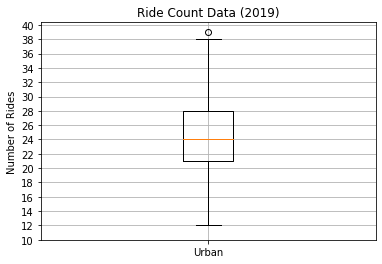

In [75]:
# Create a box-and-whisker plot for the urban cities ride count using Object Oriented Methodology
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

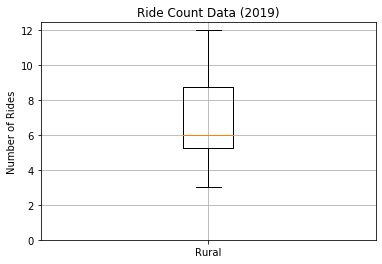

In [78]:
# Creates a box-and-whisker plot for rural cities ride counts
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,14, step=2.0))
ax.grid()
plt.show()

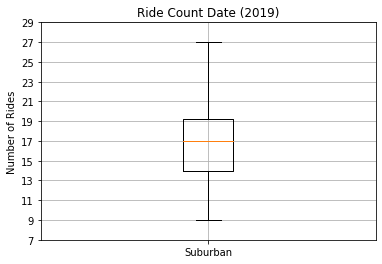

In [84]:
# Creates a box-and-whisker plot for Suburban cities ride counts
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(7,30, step=2.0))
ax.grid()
plt.show()

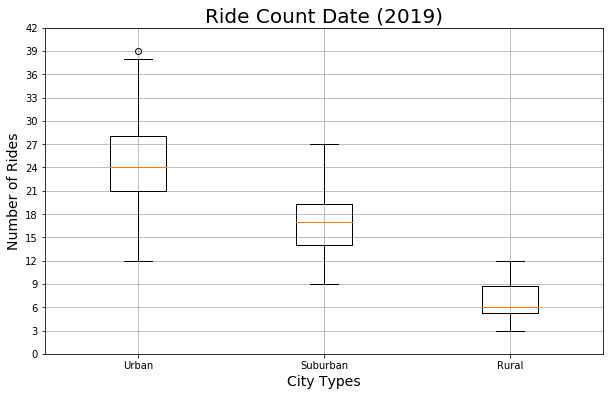

In [91]:
# Shows all three box-and-whisker plots as one using Object Oriented methods
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig,ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

plt.savefig("analysis/Fig2.png")
plt.show()



In [93]:
# Get the city that matches 39 (the outlier).
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


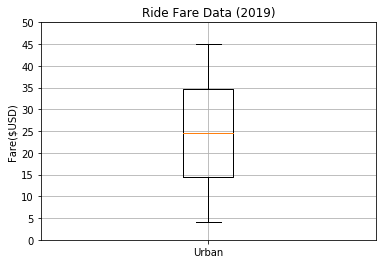

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [94]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

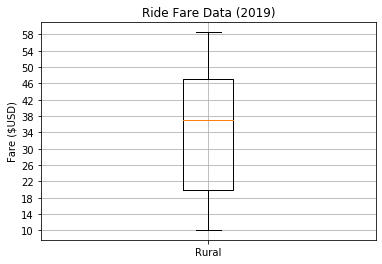

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [104]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10,60, step=4.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

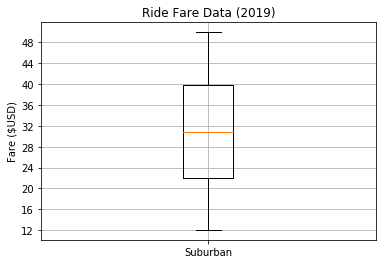

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [110]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(12,50, step=4.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

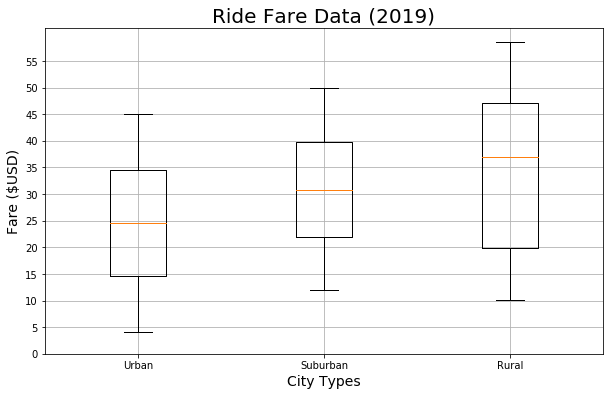

In [111]:
# Shows all three box-and-whisker plots as one using Object Oriented methods
x_labels = ['Urban', 'Suburban', 'Rural']
ride_fares = [urban_fares, suburban_fares, rural_fares]
fig,ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fares, labels=x_labels)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")
plt.show()


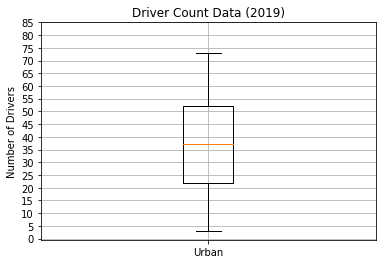

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [113]:
# Create box-and whisker olot for urban driver count
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

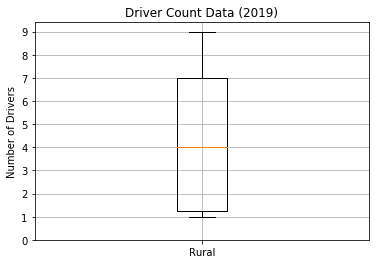

Summary Statistics


count    18.000000
mean      4.333333
std       2.828427
min       1.000000
25%       1.250000
50%       4.000000
75%       7.000000
max       9.000000
Name: driver_count, dtype: float64

In [118]:
# Box-and-Whisker plot for Rural driver count
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_driver_count, labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,10, step= 1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_driver_count.describe()

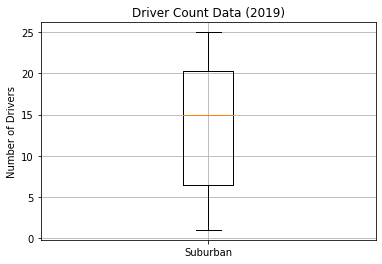

Summary Statistics


count    36.000000
mean     13.611111
std       8.022389
min       1.000000
25%       6.500000
50%      15.000000
75%      20.250000
max      25.000000
Name: driver_count, dtype: float64

In [122]:
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_driver_count, labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_driver_count.describe()

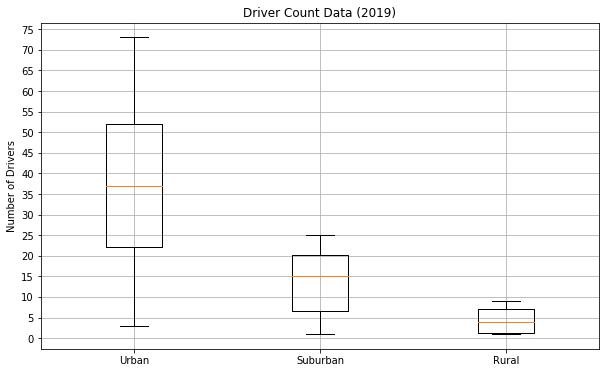

In [124]:
# Combined box-and-whisker plots driver count by city
x_labels = ['Urban', 'Suburban', 'Rural']
driver_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize= (10,6))
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()
plt.savefig('analysis/Fig4.png')
plt.show()


In [140]:
#
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
total_fares = pyber_data_df['fare'].sum()
type_percent = sum_fares_by_type / total_fares * 100
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [142]:
# Percentage of fare for each city type in one line
type_percent = pyber_data_df.groupby(['type']).sum()['fare'] / pyber_data_df['fare'].sum() * 100
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

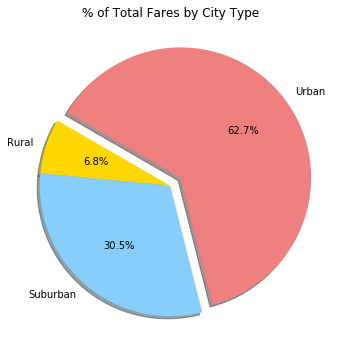

In [150]:

import matplotlib as mpl

plt.subplots(figsize=(10,6))
plt.pie(type_percent, 
        labels=["Rural", 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle= 150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")
plt.show()